# Usage of the `calcimetry` module

This is a high level (low code) API in python to request information stored in the database

In [1]:
import sys
sys.path.append('..')

from calcimetry.mongo_api import MongoInfo

# parameters where the database is stored, can obviously be distant.
HOST='localhost'
PORT=27017

### Retrieves all drill names

In [2]:
from calcimetry.calcimetry_api import CalcimetryAPI

mongo_info = MongoInfo(host=HOST, port=PORT)
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.get_drill_names())

    # but maybe this makes sense
    print(calcimetry_api.get_drill_list())

{'SDZ1258', 'OHZ2028', 'REP2209', 'REP2303', 'TER1201', 'OHZ2022', 'OHZ2002', 'OHZ6560', 'NIH2011', 'PEP1001', 'SDZ1276', 'KEY1206', 'NSC1414', 'OHZ2005', 'SUG1118', 'SDZ1287', 'OMA4003', 'GGD4023', 'GGD4024', 'SDZ1256', 'GIS1001', 'OHZ2009', 'IBE2001', 'SDZ1291', 'KEY1006', 'KEY1203', 'KEY1001', 'DCN2003', 'TER1202', 'DPC3022', 'GIS1002', 'MAG3002', 'OHZ5303', 'SUG2028', 'TPV1322', 'PAC1002', 'NSC1411', 'IBE2003', 'SUG2020', 'BPE4024', 'PAC1001', 'DIR1001', 'PGZ1022', 'SUG1202', 'NSC1412', 'REP2206', 'OHZ2021', 'OHZ2010', 'KEY1205', 'DIR2001', 'SUG1302', 'OHZ7004', 'OHZ6563', 'DIR1003', 'REP2302', 'OHZ2023', 'PEP1002', 'OHZ1705', 'NIH2012', 'GIS1003', 'KEY1002', 'OHZ2003', 'OHZ1525', 'KEY1003', 'OHZ2020', 'FOR1002', 'OHZ1842', 'DIR2003', 'OHZ2004', 'OHZ6128', 'OHZ6561', 'SUG1106', 'SDZ1290', 'OHZ5001', 'SDZ1289', 'KEY1202', 'OHZ1304', 'OHZ2007', 'PAC2003', 'REP2104', 'SUG1203', 'OHZ3004', 'OHZ1844', 'KEY1005', 'SUG1101', 'MAG3003', 'SUG1107', 'TER1302', 'IBE2002', 'PEP1003', 'PEP2002'

### Retrieves image ids for one drillname
 

In [3]:
drillname="IBE2003"
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.get_images_id(drillname))

[580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 665, 666, 667, 668, 669]


### Retrieve one image and its description from its id

/data/andra
{'ImageId': 580, 'FileName': 'GTR2018-12_0028-IBE2003_0000_0108.JPG', 'DrillName': 'IBE2003', 'Cote0': 0, 'Cote1': 108, 'PxSize': 19163, 'PySize': 4833, 'px0': 72, 'px1': 19017, 'k_Up': [[9950, 2299], [11623, 2294], [13465, 2318], [14444, 2319], [18247, 2333], [19149, 2348]], 'k_Down': [[9970, 3258], [12825, 3275], [13456, 3260], [13565, 3278], [14956, 3271], [17353, 3251], [18194, 3249], [19144, 3261]], 'k_Arrow': [[9835, 2796], [11468, 2828], [13266, 2856], [13399, 2891], [14086, 2885], [19150, 2875]], 'criteria': {'n_measurements': 3, 'resolution': 0.005700712589073635, 'y_ratio': 0.19532381543554728}}


/work/armitagj/miniconda3/envs/ai.calcimetry/lib/python3.10/site-packages/PIL/Image.py:3011: DecompressionBombWarning: Image size (92614779 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


# of measurements for this img: 3


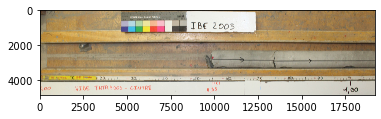

In [9]:
import matplotlib.pyplot as plt
from calcimetry.carrot_img import CarrotImage
IMG_ID = 580
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    print(calcimetry_api.read_image_info(IMG_ID)) # database info 

    img = calcimetry_api.read_image(IMG_ID)
    plt.imshow(img.jpg)

    # CarrotImage infos
    print(f"# of measurements for this img: {img.n_measurements}")


### Select one part of the image at one measurement location


In [10]:
from calcimetry.measurement import Measurement

idx_measure = 3
measure = img.measurements[idx_measure]

# display some information of the measurement
print(measure)



IndexError: list index out of range

Text(0.5, 0, 'val1m: 32')

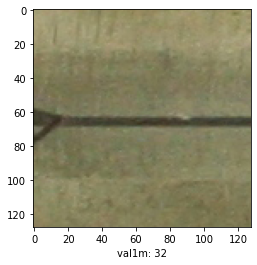

In [30]:
dim = 128
center = (
    img.p_x(measure.cote) + dim // 2, # get for this picture the position in pixel from this measure, shift of half of the size
    img.k_arrow.p_y(measure.cote) # get on k_arrow line the position in pixel from this measure
    )
vignette = calcimetry_api.read_vignette(IMG_ID, center, dim=dim)
plt.imshow(vignette)
plt.xlabel(f"val1m: {measure.val_1m}")


### Retrieves images infos as a pandas dataframe

In [32]:
import pandas as pd
with CalcimetryAPI(mongo_info=mongo_info) as calcimetry_api:
    df = calcimetry_api.get_images_df()
    print(df.head())

/data/andra
   ImageId                               FileName DrillName  Cote0  Cote1  \
0      867  GTR2005-08_0037_KEY1207_0000_0091.jpg   KEY1207      0     91   
1      868  GTR2005-08_0037_KEY1207_0093_0191.jpg   KEY1207     93    191   
2      869  GTR2005-08_0037_KEY1207_0126_0210.jpg   KEY1207    126    210   
3     1437  GTR2020-02_0003-OHZ5310_0000_0108.JPG   OHZ5310      0    108   
4     1438  GTR2020-02_0003-OHZ5310_0078_0199.JPG   OHZ5310     78    199   

   PxSize  PySize    px0      px1  \
0    2048     447  136.0   2022.0   
1    2048     468    1.0   2027.0   
2    1920     480    0.0   1741.0   
3   19113    4038  102.0  19073.0   
4    5158    1019    5.0   5123.0   

                                                k_Up  \
0  [[207, 138], [591, 141], [891, 148], [1262, 15...   
1  [[8, 141], [359, 139], [643, 142], [1065, 148]...   
2  [[1, 136], [84, 140], [471, 139], [825, 145], ...   
3  [[10578, 1263], [10624, 1256], [10860, 1269], ...   
4  [[4, 302], [601, 28